# 数据挖掘大作业一：数据探索性分析与数据预处理

## 姓名：吴殿钊 学号：3220180754

## (2)数据集：Consumer & Visitor Insights For Neighborhoods

In [1]:
#导入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import copy

In [2]:
#读取数据集
homework_file = r"cbg_patterns.csv"
csv_file = pd.read_csv(homework_file, low_memory=False)

In [3]:
csv_file

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."
5,1.097006e+10,1538352000,1541030400,152557.0,23556.0,"{""010970063011"":370,""010970063021"":351,""010970...","{""010970063011"":328,""010970064023"":125,""010970...",40327.0,"[""walmart""]","[""walmart"",""Shell Oil"",""Dollar General"",""mcdon...","[""walmart"",""Winn Dixie"",""Ollie's Bargain Outle...","[7153,6710,6479,6556,7460,8527,12533,12134,106...","{""Monday"":23968,""Tuesday"":23788,""Wednesday"":23..."
6,1.103006e+10,1538352000,1541030400,66576.0,9252.0,"{""010890028021"":152,""011030057011"":152,""010950...","{""010890111001"":254,""010950305005"":108,""010890...",29100.0,"[""walmart"",""Chick-fil-A""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chick...","[""United States Postal Service (USPS)"",""SUBWAY...","[2261,2191,2140,2130,2202,2818,4315,5583,4157,...","{""Monday"":10269,""Tuesday"":10568,""Wednesday"":99..."
7,1.115040e+10,1538352000,1541030400,23534.0,2140.0,"{""011150403001"":114,""011150403003"":110}",{},27052.0,"[""The American Legion"",""Dollar General"",""Jack'...","[""Jack's Family Restaurants"",""walmart"",""Dollar...","[""Dollar General"",""United States Postal Servic...","[2459,2397,2363,2385,2466,2442,2509,3292,2007,...","{""Monday"":3578,""Tuesday"":3520,""Wednesday"":3696..."
8,2.020001e+10,1538352000,1541030400,20349.0,6101.0,"{""020200027114"":94,""020200028232"":83,""02020002...","{""020200016021"":103,""020200011001"":92,""0202000...",8092.0,"[""Papa Murphy's"",""starbucks"",""Holiday Station""]","[""starbucks"",""walmart"",""mcdonalds"",""Holiday St...","[""Papa Murphy's"",""Burger King US"",""Chevron"",""P...","[673,554,484,439,450,476,583,1313,942,939,1154...","{""Monday"":3153,""Tuesday"":3351,""We

### 对于数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数

In [4]:
# 数值属性统计
def numeric_statistic(csv_file, numeric_attr):
    result_dict = {}
    for column in numeric_attr:
        column_series = copy.copy(csv_file[column])
        clean_series = column_series.dropna()

        num_of_NaN = column_series.__len__() - clean_series.__len__()

        clean_list = clean_series.values.tolist()

        clean_list.sort()
        len = clean_list.__len__()
        max_value = clean_list[-1]
        min_value = clean_list[0]
        sum_value = sum(clean_list)
        mean_value = sum_value / clean_list.__len__()

        Q1 = clean_list[int((len + 1) * 0.25)]
        Q2 = clean_list[int((len + 1) * 0.5)]
        Q3 = clean_list[int((len + 1) * 0.75)]

        result = [column,max_value, min_value, mean_value, Q2, [Q1, Q2, Q3], num_of_NaN]
        print(result)

#### 该数据集存在raw_visit_count、raw_visitor_count、distance_from_home3个数值属性

In [5]:
numeric_attr = ['raw_visit_count','raw_visitor_count','distance_from_home']

In [6]:
numeric_statistic(csv_file, numeric_attr)

['raw_visit_count', 7179900.0, 60.0, 47930.65965036328, 30640.0, [17042.0, 30640.0, 56678.0], 106]
['raw_visitor_count', 6113949.0, 50.0, 11820.319921678474, 6541.0, [3430.0, 6541.0, 13099.0], 106]
['distance_from_home', 6297845.0, 706.0, 35112.80346275587, 14614.0, [8584.0, 14614.0, 31398.0], 217]


#### raw_visit_count属性中，最大值717900，最小值60，均值47931，中位数830640，四分位数[17042,30640,56678],缺失值个数为106；

#### raw_visitor_count属性中，最大值6113949，最小值50，均值11820，中位数6541，四分位数[3430,6541,13099],缺失值个数为106;

#### distance_from_home属性中，最大值6297845，最小值706，均值35113，中位数14614，四分位数[8584,14614,31398],缺失值个数为217

### 对标称属性，给出每个可能取值的频数

In [7]:
def nominal_statistic(csv_file, nominal_attr):
    result_dict = {}
    result_list = []
    for column in csv_file.columns:
        if column in nominal_attr :
            for i in range(len(csv_file[column])) :
                for j in range(len(csv_file[column][i][1:-1].split(','))):
                     if len(csv_file[column][i]) > 5 :

                        result_list.append(csv_file[column][i][1:-1].split(',')[j].strip('\"'))
            # result_list.append(csv_file[column][0][1:-1].split(',')[1].strip('\"'))
    for i in set(result_list):
        result_dict[i] = result_list.count(i)
    
    print("有效访问量：",len(result_list))
    print(sorted(result_dict.items(), key = lambda asd:asd[1] , reverse= True))

In [8]:
nominal_attr = ['top_brands']

In [9]:
nominal_statistic(csv_file, nominal_attr)

有效访问量： 647311
[('United States Postal Service (USPS)', 22119), ('SUBWAY', 16600), ('Dollar General', 13515), ('mcdonalds', 12670), ('Shell Oil', 10940), ('Cricket Wireless', 10195), ('starbucks', 8088), ('Family Dollar Stores', 7658), ('The American Legion', 7374), ('Walgreens', 6967), ("Dunkin' Donuts", 6912), ('CVS', 6899), ('7-Eleven US', 6659), ('Taco Bell', 5712), ('Burger King US', 5649), ('BP', 5524), ('Dollar Tree', 5359), ('Circle K Stores', 5130), ('Chevron', 5128), ('Exxon Mobil', 5101), ('Aflac (American Family Life Assurance)', 4871), ('National Association for the Education of Young Children (NAEYC)', 4845), ("Wendy's", 4710), ('walmart', 4623), ('State Farm', 4578), ('Marathon Petroleum', 4405), ('CrossFit', 4392), ('Sunoco', 4294), ('CITGO Petroleum', 4279), ('Pizza Hut', 4209), ("Domino's Pizza", 4101), ('Mobil', 4098), ('Napa Auto Parts', 3932), ('AutoZone', 3903), ('VFW (Veterans of Foreign Wars)', 3761), ('Valero Energy', 3650), ('Dairy Queen', 3560), ('Health Mart'

#### 该数据集存在related_same_day_brand、related_same_month_brand等多个标称属性

#### 以top_brands为例，存储的CBG中访问过的顶级品牌列表，进行数据清洗之后，统计出总计647311次有效访问量，并进行降序排序

#### 其中United States Postal Service (USPS), 22119；SUBWAY, 16600, Dollar General, 13515, mcdonalds, 12670

### 针对数值属性 1、绘制直方图，用qq图检验其分布是否为正态分布  2、绘制盒图，对离群值进行识别

In [10]:
# 数据清洗
def clean_data(csv_file, column, percent):
    # 去除缺失值
    values_dropna = csv_file[column].dropna().values
    values_count = csv_file[column].dropna().value_counts()
    values_clean = list(values_dropna)

    # 为加快速度，对所有取值种类的频数-1，近似等效于去除频率为1的值
    for item in values_count.index:
        values_clean.remove(item)

    values_clean.sort()
    len = values_clean.__len__()

    # 按percent比例截尾
    vc = values_clean[int(len * percent):int(len * (1 - percent))]

    return values_dropna, values_clean, vc

In [11]:
# 盒形图
def draw_box(column, values_clean):
    plt.figure(figsize=(2.8,2))
    # 离散点 (图标样式,图标颜色,大小,..)
    fp = {'marker': "o", 'markerfacecolor': 'blue', 'markersize': 5, 'linestyle': 'none'}
    plt.title("Box:" + str(column))
    plt.boxplot(values_clean, flierprops=fp)
    plt.show()

# 直方图
def draw_hist(column, vc):
    plt.figure(figsize=(2.8, 2))
    plt.title("Hist:" + str(column))
    plt.hist(vc, bins=20)
    plt.show()
    pass

In [12]:
# qq图检测是否为正态分布
def draw_qq_norm(column, vc):
    plt.figure(figsize=(2.8, 2))
    stats.probplot(vc, dist="norm", plot=plt)
    plt.title("Q-Q:" + str(column))
    plt.show()

# qq图检测两属性间的相关度
def draw_qq_double(csv_file, double_column):
    data = csv_file[list(double_column)].dropna()
    x = data[double_column[0]].values
    y = data[double_column[1]].values

    plt.figure(figsize=(2.8,2))
    plt.title(double_column[0] + "_" + double_column[1])
    plt.plot(x, y, 'ro')
    plt.show()


In [13]:
# 画图
def draw_numeric(csv_file, numeric_attr):
    for column in numeric_attr:
        values_dropna, values_clean, vc = clean_data(csv_file, column, 0.05)
        draw_hist(column, vc)
        draw_qq_norm(column, vc)
        draw_box(column, values_clean)

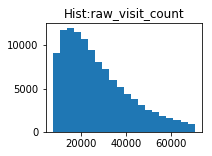

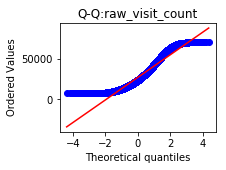

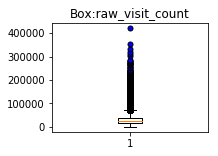

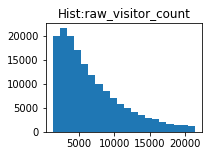

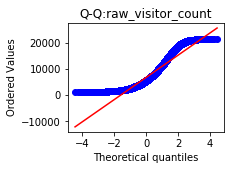

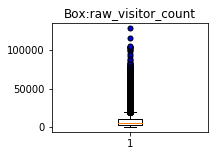

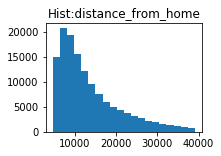

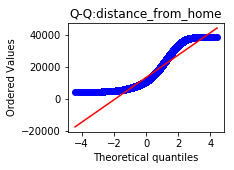

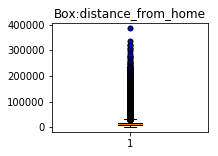

In [11]:
draw_numeric(csv_file, numeric_attr)

#### 由盒形图、箱型图、QQ图分析可以得出，'raw_visit_count','raw_visitor_count','distance_from_home'三个属性不完全属于正太分布，只符合正太分布中间值的后半分布

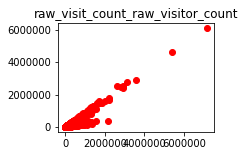

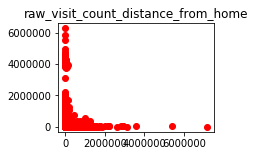

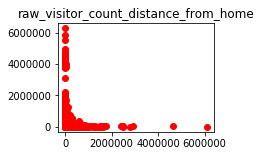

In [14]:
# 绘制两个属性的qq图，判断相关性
for double_column in itertools.combinations(numeric_attr, r=2):
    draw_qq_double(csv_file, double_column)

#### 如图所示，可以判断，'raw_visit_count','raw_visitor_count',成正相关；

#### 'raw_visit_count','raw_visitor_count'和'distance_from_home'呈极端的负相关，但不是完全负相关关系

### 数据缺失的处理
    1、将缺失部分剔除 
    2、用最高频率值来填补缺失值 
    3、通过属性的相关关系来填补缺失值 
    4、通过数据对象之间的相似性来填补缺失值

#### 接下来将使用上述四种方式对缺失数据经行处理，输出盒形图、直方图、QQ图；

#### 并统计处理后数据的最大值，最小值，均值，中位数以及四分位数输出，并添加在resultdict中，最后做比较分析

In [15]:
resultdict=[]

#### 1、将缺失部分剔除

In [16]:
# 缺失数据处理后数值属性统计
def numeric_total(new_column):

    new_column.sort()
    len = new_column.__len__()
    max_value = new_column[-1]
    min_value = new_column[0]
    sum_value = sum(new_column)
    mean_value = sum_value / new_column.__len__()

    Q1 = new_column[int((len + 1) * 0.25)]
    Q2 = new_column[int((len + 1) * 0.5)]
    Q3 = new_column[int((len + 1) * 0.75)]

    result = [max_value, min_value, mean_value, Q2, [Q1, Q2, Q3]]
    resultdict.append(result)
    print(result)

In [17]:
# 去除缺失值 绘图函数
def complete_dropna(csv_file, column):
    values_dropna = csv_file[column].dropna().values
    draw_hist(column, values_dropna)
    draw_qq_norm(column, values_dropna)
    draw_box(column, values_dropna)

    numeric_total(values_dropna)

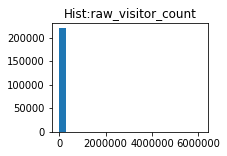

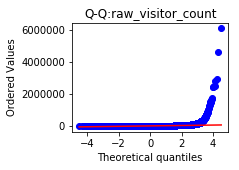

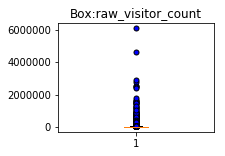

[6113949.0, 50.0, 11820.319921678474, 6541.0, [3430.0, 6541.0, 13099.0]]


In [18]:
complete_dropna(csv_file, 'raw_visitor_count')

#### 2、用最高频率值来填补缺失值

In [19]:
# 用最高频率值来填补缺失值 绘图函数
def complete_fre_attr(csv_file, column):
    value_count = csv_file[column].dropna().value_counts()
    max_fre_value = value_count.index[0]
    data = csv_file[column]
    miss_index = data[data.isnull()].index
    complete_data = data.copy()
    for i in miss_index:
        complete_data[i] = max_fre_value

    draw_hist(column, complete_data)
    draw_qq_norm(column, complete_data)
    draw_box(column, complete_data)
    
    #print(list(complete_data))
    numeric_total(list(complete_data))

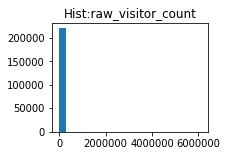

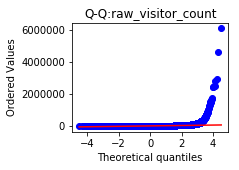

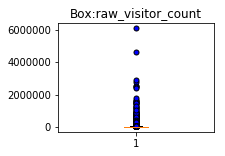

[6113949.0, 50.0, 11815.744290665278, 6536.0, [3426.0, 6536.0, 13092.0]]


In [20]:
complete_fre_attr(csv_file, 'raw_visitor_count')

#### 3、通过属性的相关关系来填补缺失值

In [21]:
# 通过属性的相关关系来填补缺失值 绘图函数
def complete_rel_attr(csv_file, double_column):
    target_data = csv_file[double_column[0]]
    source_data = csv_file[double_column[1]]
    flag1 = target_data.isnull().values
    flag2 = source_data.isnull().values
    complete_data = target_data.copy()
    for index, value in target_data.iteritems():
        if flag1[index] == True and flag2[index] == False:

            complete_data[index] = 1 - source_data[index]

    values_clean = list(complete_data.dropna().values)

    # 去除频率为1的值
    for value, count in complete_data.value_counts().iteritems():
        if count == 1:
            values_clean.remove(value)

    draw_hist(double_column[0], values_clean)
    draw_qq_norm(double_column[0], values_clean)
    draw_box(double_column[0], values_clean)
    
    numeric_total(values_clean)
    
    

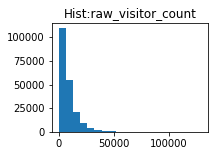

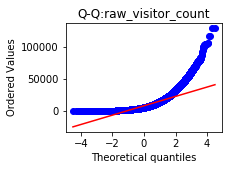

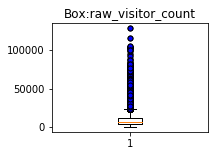

[129026.0, 50.0, 8630.787103677752, 5992.0, [3253.0, 5992.0, 11047.0]]


In [22]:
complete_rel_attr(csv_file, ['raw_visitor_count', 'raw_visit_count'])

#### 4、通过数据对象之间的相似性来填补缺失值

In [23]:
# 查找两个对象间相异度最小的 指定的 column值
def find_dis_value(csv_file, pos, column, numeric_attr):

    def dis_objs(tar_obj, sou_obj):
        dis_value = 0
        count = 0
        for column in tar_obj.index:
            if tar_obj[column] != np.NaN and sou_obj[column] != np.NaN:
                if column in numeric_attr:
                        values_sort = csv_file[column].dropna().values.sort()
                        denominator = values_sort[-1] - values_sort[0]
                        dis_value += abs(tar_obj[column] - sou_obj[column])/denominator
                        count += 1

                elif tar_obj[column] == sou_obj[column]:
                    dis_value += 1
                count += 1
            else:
                continue
        return dis_value/count

    mindis = 9999
    result_pos = -1
    target_obj = csv_file.ix[pos]
    for index in csv_file.index:
        if index == pos:
            continue
        source_obj = csv_file.ix(index)
        tmp = dis_objs(target_obj, source_obj)
        if tmp < mindis:
            result_pos = index
    return result_pos

# 通过数据对象之间的相似性来填补缺失值 绘图函数
def complete_smi_attr(csv_file, column, numeric_attr):
    data = csv_file[column].copy()
    for index, value in data.iteritems():
        if value == np.NaN:
            data[index] = data[find_dis_value(csv_file, index, column, numeric_attr)]
    draw_hist(column, data.dropna().values)
    draw_qq_norm(column, data.dropna().values)
    draw_box(column, data.dropna().values)
    
    numeric_total(data.dropna().values)

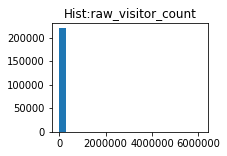

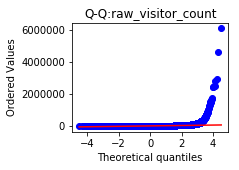

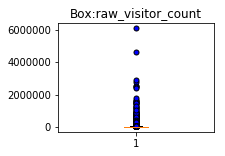

[6113949.0, 50.0, 11820.319921678474, 6541.0, [3430.0, 6541.0, 13099.0]]


In [25]:
complete_smi_attr(csv_file, 'raw_visitor_count', numeric_attr)

In [26]:
resultdict

[[6113949.0, 50.0, 11820.319921678474, 6541.0, [3430.0, 6541.0, 13099.0]],
 [6113949.0, 50.0, 11815.744290665278, 6536.0, [3426.0, 6536.0, 13092.0]],
 [129026.0, 50.0, 8630.787103677752, 5992.0, [3253.0, 5992.0, 11047.0]],
 [6113949.0, 50.0, 11820.319921678474, 6541.0, [3430.0, 6541.0, 13099.0]]]

### 通过对比四种缺失值得处理方法得到的结果来看，使用属性的相关关系来填补缺失值得到的数据结果与其他三种有相对明显的差异，其他三种处理方式得到的结果基本相似，至于说哪一种方式的效果更好，则需要在具体的实验中加以验证。